In [318]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split   # разделение выборки на train и test

from sklearn.model_selection import cross_val_score     # кросс-валидация
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
import xgboost as xgb, lightgbm as lgbm, catboost as catb

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler    # стандартизация данных
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler      # масштабирование MinMaxScaler
from sklearn.preprocessing import Normalizer        # масштабирование Normalizer
from sklearn.decomposition import PCA   # метод главных компонент

from sklearn.linear_model import LogisticRegression     # модели классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import VotingClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

In [319]:
# https://www.kaggle.com/c/geekbrains-competitive-data-analysis/overview

In [320]:
# пути
path_train = '/home/tefi/Tefi/Project_sport/train.csv'
path_test = '/home/tefi/Tefi/Project_sport/test.csv'
path_applications_history = '/home/tefi/Tefi/Project_sport/applications_history.csv'
path_bki = '/home/tefi/Tefi/Project_sport/bki.csv'
path_client_profile = '/home/tefi/Tefi/Project_sport/client_profile.csv'
path_payments = '/home/tefi/Tefi/Project_sport/payments.csv'
path_sample_submit = '/home/tefi/Tefi/Project_sport/sample_submit.csv'

# загрузка данных из файлов в соответствующие переменные
train_pro = pd.read_csv(path_train)
test_pro = pd.read_csv(path_test)
applications_history = pd.read_csv(path_applications_history)
bki = pd.read_csv(path_bki)
client_profile = pd.read_csv(path_client_profile)
payments = pd.read_csv(path_payments)
sample_submit = pd.read_csv(path_sample_submit)  # образец submit

Описание датасета:

APPLICATION_NUMBER - номер заявки
NAME_CONTRACT_TYPE - тип договора (наличные, карта)
TARGET - целевая переменная

История предыдущих заявок клиента:
PREV_APPLICATION_NUMBER - предыдущий номер заявки
AMOUNT_ANNUITY - сумма в год
AMT_APPLICATION - сумма заявки
AMOUNT_CREDIT - сумма кредита
AMOUNT_PAYMENT - сумма выплаты
AMOUNT_GOODS_PAYMENT - сумма стоимости товара 
NAME_CONTRACT_STATUS - статус годовора (одобрено, отклонено)
DAYS_DECISION - разрешение на кол-во дней
NAME_PAYMENT_TYPE - тип оплаты (наличными через банк и т.п.)
CODE_REJECT_REASON - причина отклонения
NAME_TYPE_SUITE - поручители
NAME_CLIENT_TYPE - тип клиента (новый, повторно)
NAME_GOODS_CATEGORY - категория товара
NAME_PORTFOLIO - название портфеля (наличные, карта)
NAME_PRODUCT_TYPE - тип товара (x-sell, wolk-in)
SELLERPLACE_AREA - площадь продажи
CNT_PAYMENT - кол-во выплат по кредиту
NAME_YIELD_GROUP - доходная группа (средняя, ниже среднего)
DAYS_FIRST_DRAWING - 
DAYS_FIRST_DUE - первый срок
DAYS_LAST_DUE_1ST_VERSION - прошло дней с 1 версии
DAYS_LAST_DUE - последний день
DAYS_TERMINATION - дней до завершения
NFLAG_INSURED_ON_APPROVAL - застрахован по принуждению

данные БКИ о предыдущих кредитах клиента:
BUREAU_ID - номер бюро
CREDIT_ACTIVE - активен ли кредит
CREDIT_CURRENCY - валюта кредита
DAYS_CREDIT - дни кредита
CREDIT_DAY_OVERDUE - кол-во дней просрочки
DAYS_CREDIT_ENDDATE - дней до конца кредита
DAYS_ENDDATE_FACT - фактически дней
AMT_CREDIT_MAX_OVERDUE - максимальная сумма просроченного кредита
CNT_CREDIT_PROLONG - продление текущего кредита
AMT_CREDIT_SUM - сумма кредита
AMT_CREDIT_SUM_DEBT - задолженность по кредиту
AMT_CREDIT_SUM_LIMIT - сумма предельного кредита
AMT_CREDIT_SUM_OVERDUE - сумма просроченного кредита
CREDIT_TYPE - тип кредита (потребительский)
DAYS_CREDIT_UPDATE - обновление дней кредита
AMT_ANNUITY - сумма ежегодной выплаты

Клиентский профиль, некоторые знания, которые есть у компании о клиенте:
GENDER - пол
CHILDRENS - дети
TOTAL_SALARY - зарплата
AMOUNT_CREDIT - сумма кредита
AMOUNT_ANNUITY - сумма ежегодной выплаты
EDUCATION_LEVEL - образование
FAMILY_STATUS - семейный статус (женат)
REGION_POPULATION - население региона
AGE - возраст
DAYS_ON_LAST_JOB - дней на последней работе 
OWN_CAR_AGE - возраст собственного автомобиля
FLAG_PHONE - наличие телефона
FLAG_EMAIL - наличие электронной почты
FAMILY_SIZE - размер семьи (2, 3)
EXTERNAL_SCORING_RATING_1 - внешний рейтинг 1
EXTERNAL_SCORING_RATING_2 - внешний рейтинг 2
EXTERNAL_SCORING_RATING_3 - внешний рейтинг 3
AMT_REQ_CREDIT_BUREAU_HOUR - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_DAY - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_WEEK - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_MON - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_QRT - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_YEAR - сумма запросов на выдачу кредитов

История платежей клиента:
NUM_INSTALMENT_VERSION - номер расчетной версии
NUM_INSTALMENT_NUMBER - расчетный номер
DAYS_INSTALMENT - дни рассрочки
DAYS_ENTRY_PAYMENT - оплата по кредиту в день
AMT_INSTALMENT - сумма расчета
AMT_PAYMENT - сумма выплаты

In [321]:
train_pro.head(5)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash
3,123710391,1,Cash
4,123590329,1,Cash


In [322]:
train_pro['APPLICATION_NUMBER'].nunique()==train_pro.shape[0]  

True

In [323]:
applications_history['APPLICATION_NUMBER'].nunique()==applications_history.shape[0] 

False

In [324]:
bki['APPLICATION_NUMBER'].nunique()==bki.shape[0]

False

In [325]:
client_profile['APPLICATION_NUMBER'].nunique()==client_profile.shape[0]

True

In [326]:
payments['APPLICATION_NUMBER'].nunique()==payments.shape[0]

False

In [327]:
train = pd.merge(train_pro, client_profile, on='APPLICATION_NUMBER', how='left')
train_data = train.drop(['TARGET'], axis = 'columns')
train_target = train['TARGET']
train_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
test_data = pd.merge(test_pro, client_profile, on='APPLICATION_NUMBER', how='left')
test_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123724268,Cash,M,0.0,117000.0,1125000.0,32895.0,Secondary / secondary special,Married,0.028663,16007.0,2646.0,20.0,0.0,0.0,2.0,NaN,0.628266,NaN,0.0,0.0,0.0,0.0,1.0,4.0
1,123456549,Cash,F,2.0,81000.0,312768.0,17095.5,Secondary / secondary special,Married,0.019689,10315.0,459.0,NaN,0.0,0.0,4.0,NaN,0.578161,0.18849,0.0,0.0,1.0,0.0,0.0,2.0


In [329]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          110093 non-null  int64  
 1   NAME_CONTRACT_TYPE          110093 non-null  object 
 2   GENDER                      89539 non-null   object 
 3   CHILDRENS                   89539 non-null   float64
 4   TOTAL_SALARY                89539 non-null   float64
 5   AMOUNT_CREDIT               89539 non-null   float64
 6   AMOUNT_ANNUITY              89534 non-null   float64
 7   EDUCATION_LEVEL             89539 non-null   object 
 8   FAMILY_STATUS               89539 non-null   object 
 9   REGION_POPULATION           89539 non-null   float64
 10  AGE                         89539 non-null   float64
 11  DAYS_ON_LAST_JOB            89539 non-null   float64
 12  OWN_CAR_AGE                 30533 non-null   float64
 13  FLAG_PHONE    

In [330]:
features_1 = ['GENDER', 'CHILDRENS', 'EDUCATION_LEVEL', 'FAMILY_STATUS', 'REGION_POPULATION', 'OWN_CAR_AGE', 
             'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2', 
              'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
              'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_1:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].mode()[0]
    
for i in features_1:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].mode()[0]

In [331]:
features_2 = ['TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB']

for i in features_2:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].median()
for i in features_2:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].median()

In [332]:
train_data.select_dtypes(include = ['float64']).columns

Index(['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1',
       'EXTERNAL_SCORING_RATING_2', 'EXTERNAL_SCORING_RATING_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [333]:
features_3 = ['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB', 
              'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
              'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
              'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_3:
    train_data[i] = train_data[i].astype(int)
for i in features_3:
    test_data[i] = test_data[i].astype(int)

In [334]:
train_data.select_dtypes(include = ['object']).columns

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], dtype='object')

In [335]:
features_4 = ['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS']
for i in features_4:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i])], axis=1)
for i in features_4:
    test_data = pd.concat([test_data, pd.get_dummies(test_data[i])], axis=1)

train_data = train_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')
test_data = test_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')


In [336]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   APPLICATION_NUMBER             110093 non-null  int64  
 1   CHILDRENS                      110093 non-null  int64  
 2   TOTAL_SALARY                   110093 non-null  int64  
 3   AMOUNT_CREDIT                  110093 non-null  int64  
 4   AMOUNT_ANNUITY                 110093 non-null  int64  
 5   REGION_POPULATION              110093 non-null  float64
 6   AGE                            110093 non-null  int64  
 7   DAYS_ON_LAST_JOB               110093 non-null  int64  
 8   OWN_CAR_AGE                    110093 non-null  int64  
 9   FLAG_PHONE                     110093 non-null  int64  
 10  FLAG_EMAIL                     110093 non-null  int64  
 11  FAMILY_SIZE                    110093 non-null  int64  
 12  EXTERNAL_SCORING_RATING_1     

In [337]:
train_data['target'] = train_target
train_data['target'].value_counts()

0    101196
1      8897
Name: target, dtype: int64

In [338]:
train_data_target_1 = train_data.loc[train_data['target'] == 1]
train_data_balansing = train_data
for i in range (0,5):
    train_data_balansing = pd.concat([train_data_balansing, train_data_target_1], axis=0)
train_data_balansing.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,XNA,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,target
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,0,3,0.700784,0.645914,0.71657,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,0,2,0.285593,0.285898,0.74630,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [339]:
train_data_balansing['target'].value_counts()

0    101196
1     53382
Name: target, dtype: int64

In [340]:
train_target = train_data_balansing['target']
train_data = train_data_balansing.copy()
train_data = train_data.drop(['target'], axis = 'columns')

In [341]:
train_data['fraction_salary'] = train_data['TOTAL_SALARY'] / train_data['FAMILY_SIZE']
train_data['fraction_salary_1'] = train_data['TOTAL_SALARY'] / (train_data['CHILDRENS'] + 1)
train_data['fraction_salary_2'] = train_data['TOTAL_SALARY'] / train_data['AMOUNT_ANNUITY']
train_data['fraction_1'] = train_data['AMOUNT_CREDIT'] / train_data['AMOUNT_ANNUITY']

test_data['fraction_salary'] = test_data['TOTAL_SALARY'] / test_data['FAMILY_SIZE']
test_data['fraction_salary_1'] = test_data['TOTAL_SALARY'] / (test_data['CHILDRENS'] + 1)
test_data['fraction_salary_2'] = test_data['TOTAL_SALARY'] / test_data['AMOUNT_ANNUITY']
test_data['fraction_1'] = test_data['AMOUNT_CREDIT'] / test_data['AMOUNT_ANNUITY']

In [342]:
train_data = train_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

test_data = test_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

In [343]:
pca = PCA(n_components=1)
N_1 = pca.fit_transform(train_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.9387

train_data['N_1'] = N_1
#train_data = train_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

N_1 = pca.transform(test_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
test_data['N_1'] = N_1
#test_data = test_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

pca = PCA(n_components=1)
N_2 = pca.fit_transform(train_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99946

train_data['N_2'] = N_2
#train_data = train_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

N_2 = pca.transform(test_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
test_data['N_2'] = N_2
#test_data = test_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

pca = PCA(n_components=1)
N_3 = pca.fit_transform(train_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99935

train_data['N_3'] = N_3
#train_data = train_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

N_3 = pca.transform(test_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
test_data['N_3'] = N_3
#test_data = test_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

In [344]:
train_data["DAYS_ON_LAST_JOB"] = train_data["DAYS_ON_LAST_JOB"].replace(365243, np.nan)
test_data["DAYS_ON_LAST_JOB"] = test_data["DAYS_ON_LAST_JOB"].replace(365243, np.nan)

In [345]:
bki_flags = [flag for flag in train_data.columns if "AMT_REQ_CREDIT_BUREAU" in flag]
train_data["bki_requests_count"] = train_data[bki_flags].sum(axis=1)

bki_flags = [flag for flag in test_data.columns if "AMT_REQ_CREDIT_BUREAU" in flag]
test_data["bki_requests_count"] = test_data[bki_flags].sum(axis=1)

In [346]:
train_data["external_scoring_prod"] = train_data["EXTERNAL_SCORING_RATING_1"] * train_data["EXTERNAL_SCORING_RATING_2"] * train_data["EXTERNAL_SCORING_RATING_3"]
train_data["external_scoring_weighted"] = train_data.EXTERNAL_SCORING_RATING_1 * 2 + train_data.EXTERNAL_SCORING_RATING_2 * 1 + train_data.EXTERNAL_SCORING_RATING_3 * 3


test_data["external_scoring_prod"] = test_data["EXTERNAL_SCORING_RATING_1"] * test_data["EXTERNAL_SCORING_RATING_2"] * test_data["EXTERNAL_SCORING_RATING_3"]
test_data["external_scoring_weighted"] = test_data.EXTERNAL_SCORING_RATING_1 * 2 + test_data.EXTERNAL_SCORING_RATING_2 * 1 + test_data.EXTERNAL_SCORING_RATING_3 * 3


In [347]:
for function_name in ["min", "max", "mean", "nanmedian", "var"]:
    feature_name = "EXTERNAL_SCORING_RATING_{}".format(function_name)
    train_data[feature_name] = eval("np.{}".format(function_name))(
        train_data[["EXTERNAL_SCORING_RATING_1", "EXTERNAL_SCORING_RATING_2", "EXTERNAL_SCORING_RATING_3"]], axis=1
    )
    
for function_name in ["min", "max", "mean", "nanmedian", "var"]:
    feature_name = "EXTERNAL_SCORING_RATING_{}".format(function_name)
    test_data[feature_name] = eval("np.{}".format(function_name))(
        test_data[["EXTERNAL_SCORING_RATING_1", "EXTERNAL_SCORING_RATING_2", "EXTERNAL_SCORING_RATING_3"]], axis=1
    )

In [348]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

cb_params = {
    "n_estimators": 600,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 7,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42,
}


#cb_params = {
#    "n_estimators": 2000,
#    "learning_rate": 0.01,
#    "loss_function": "Logloss",
#    "eval_metric": "AUC",
#    "task_type": "CPU",
#    "verbose": 50,
#    "max_depth": 6,
#    "l2_leaf_reg": 10,
#    "early_stopping_rounds": 50,
#    "thread_count": 6,
#    "random_seed": 42,
#}



model = catb.CatBoostClassifier(**cb_params)
model.fit(X = x_train, y = y_train, eval_set=[(x_valid, y_valid)])

# 'max_depth': 7  600
#(0.8465619471057402, {'n_estimators': 900, 'max_depth': 9})


0:	test: 0.6866944	best: 0.6866944 (0)	total: 47.3ms	remaining: 28.3s
10:	test: 0.7031750	best: 0.7031750 (10)	total: 572ms	remaining: 30.6s
20:	test: 0.7058234	best: 0.7058234 (20)	total: 1.09s	remaining: 30.1s
30:	test: 0.7090464	best: 0.7090464 (30)	total: 1.62s	remaining: 29.7s
40:	test: 0.7125257	best: 0.7125257 (40)	total: 2.25s	remaining: 30.6s
50:	test: 0.7152192	best: 0.7152192 (50)	total: 2.78s	remaining: 30s
60:	test: 0.7177671	best: 0.7177671 (60)	total: 3.29s	remaining: 29.1s
70:	test: 0.7204792	best: 0.7204792 (70)	total: 3.83s	remaining: 28.5s
80:	test: 0.7225426	best: 0.7225426 (80)	total: 4.33s	remaining: 27.8s
90:	test: 0.7244990	best: 0.7244990 (90)	total: 4.86s	remaining: 27.2s
100:	test: 0.7263535	best: 0.7263535 (100)	total: 5.35s	remaining: 26.5s
110:	test: 0.7276757	best: 0.7276757 (110)	total: 5.85s	remaining: 25.8s
120:	test: 0.7295706	best: 0.7295706 (120)	total: 6.35s	remaining: 25.1s
130:	test: 0.7309909	best: 0.7309909 (130)	total: 6.87s	remaining: 24.6s
1

In [349]:
train_score = roc_auc_score(y_train, model.predict(x_train, prediction_type = "Probability")[:,1])
valid_score = roc_auc_score(y_valid, model.predict(x_valid, prediction_type = "Probability")[:,1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.79, Valid-score: 0.769)
#Train-score: 0.756, Valid-score: 0.746)

Train-score: 0.79, Valid-score: 0.772)


In [350]:
y_pred_test = model.predict(test_data, prediction_type =  "Probability")[:,1]
result_test = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test.flatten(),})
result_test.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.219567
1,123456549,0.694210
2,123428178,0.508445
3,123619984,0.357379
4,123671104,0.088199


In [351]:
#filename = 'Vodorezova.csv'
#result_test.to_csv(filename, index=None)
# 72595
# 72593

In [352]:
train_data.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,Higher education,Secondary / secondary special,Married,Single / not married,fraction_salary,fraction_salary_1,fraction_salary_2,fraction_1,N_1,N_2,N_3,bki_requests_count,external_scoring_prod,external_scoring_weighted,EXTERNAL_SCORING_RATING_min,EXTERNAL_SCORING_RATING_max,EXTERNAL_SCORING_RATING_mean,EXTERNAL_SCORING_RATING_nanmedian,EXTERNAL_SCORING_RATING_var
0,123687442,1,157500,855000,25128,0.019101,15728,1719.0,11,0,3,0.700784,0.645914,0.71657,0,0,2,1,0,0,1,0,1,1,0,52500.0,78750.0,6.267908,34.025788,1.076108,279859.244154,-47826.195646,2,0.324353,4.197193,0.645914,0.71657,0.687756,0.700784,0.000917
1,123597908,0,148500,517788,24903,0.035792,15728,2206.0,7,0,2,0.285593,0.285898,0.74630,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647,0,0.060936,3.095985,0.285593,0.74630,0.439264,0.285898,0.047136


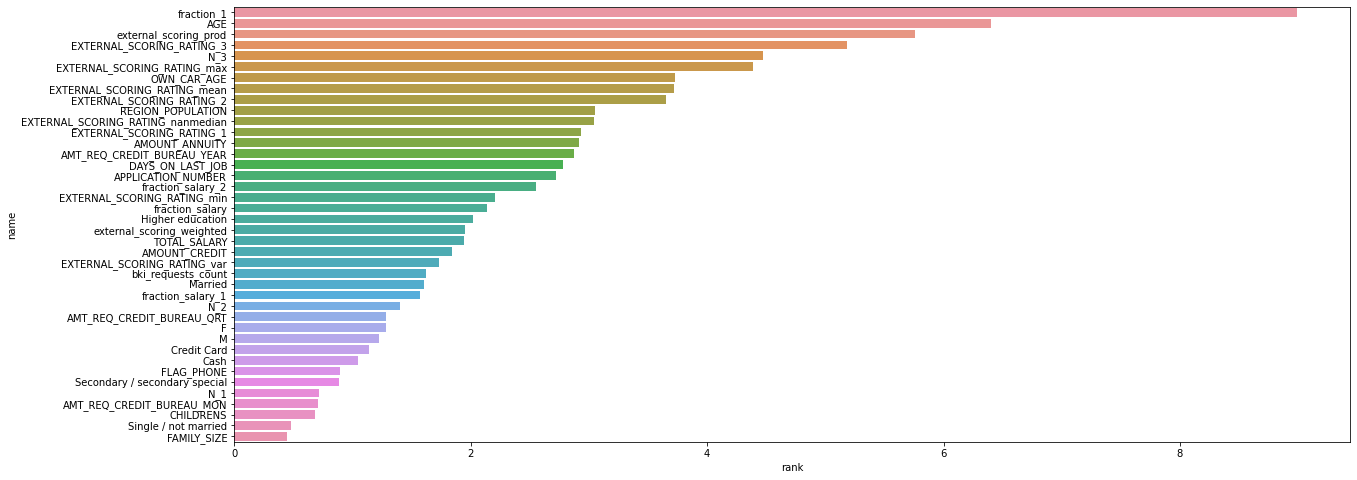

In [353]:
rank_feature_importances_ = model.feature_importances_

train_feature_importances = pd.DataFrame(rank_feature_importances_, train_data.columns)
train_feature_importances.reset_index(inplace=True)
train_feature_importances = train_feature_importances.rename(columns={'index': 'name', 0: 'rank'}) 
train_feature_importances.sort_values(by="rank", inplace=True, ascending = False)

plt.figure(figsize = ([20,8]))
sns.barplot(train_feature_importances['rank'], train_feature_importances['name'])

In [354]:
train_feature_importances['name']

28                           fraction_1
6                                   AGE
33                external_scoring_prod
13            EXTERNAL_SCORING_RATING_3
31                                  N_3
36          EXTERNAL_SCORING_RATING_max
8                           OWN_CAR_AGE
37         EXTERNAL_SCORING_RATING_mean
12            EXTERNAL_SCORING_RATING_2
5                     REGION_POPULATION
38    EXTERNAL_SCORING_RATING_nanmedian
11            EXTERNAL_SCORING_RATING_1
4                        AMOUNT_ANNUITY
16           AMT_REQ_CREDIT_BUREAU_YEAR
7                      DAYS_ON_LAST_JOB
0                    APPLICATION_NUMBER
27                    fraction_salary_2
35          EXTERNAL_SCORING_RATING_min
25                      fraction_salary
21                     Higher education
34            external_scoring_weighted
2                          TOTAL_SALARY
3                         AMOUNT_CREDIT
39          EXTERNAL_SCORING_RATING_var
32                   bki_requests_count


In [355]:
list(train_feature_importances['name'].tail(11))

['F',
 'M',
 'Credit Card',
 'Cash',
 'FLAG_PHONE',
 'Secondary / secondary special',
 'N_1',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'CHILDRENS',
 'Single / not married',
 'FAMILY_SIZE']

In [356]:
#x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

In [357]:
#73242
#params = {
#    "booster": "gbtree",
#    "objective": "binary:logistic",
#    "eval_metric": "auc",
#    "learning_rate": 0.1,
#    "n_estimators": 500,
#    "reg_lambda": 100,
#    "max_depth": 3,
#    "gamma": 10,
#    "nthread": 6,
#    "seed": 27,
#    'colsample_bytree': 0.555,
#    'min_child_weights': 369
#}


# # 73278
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 500,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27,
    'colsample_bytree': 0.555,
    'min_child_weights': 369
}

#params = {
#    "objective": "binary:logistic",
#    "booster": "gbtree",
#    "eval_metric": "auc",
#    "eta": "0.05",
#    "max_depth": 6,
#    "gamma": 0,
#    "subsample": 0.85,
#    "colsample_bytree": 0.7,
#    "colsample_bylevel": 0.632,
#    'min_child_weights': 30,
#    "alpha": 0,
#    "lambda": 0,
#    'nthread': 6,
#    'random_seed': 42,
#}

In [358]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [359]:
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

[06:02:15] WARNING: ../src/learner.cc:516: 
Parameters: { min_child_weights, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.69014	valid-auc:0.68584
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.71012	valid-auc:0.70484
[20]	train-auc:0.71789	valid-auc:0.71281
[30]	train-auc:0.72674	valid-auc:0.72144
[40]	train-auc:0.73198	valid-auc:0.72615
[50]	train-auc:0.73605	valid-auc:0.73008
[60]	train-auc:0.73863	valid-auc:0.73265
[70]	train-auc:0.74085	valid-auc:0.73472
[80]	train-auc:0.74273	valid-auc:0.73655
[90]	train-auc:0.74553	valid-auc:0.73883
[100]	train-auc:0.74684	valid-auc:0.74008
[110]	train-auc:0.74958	valid-auc:0.74214
[120]	train-a

In [360]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.827, Valid-score: 0.798)
#Train-score: 0.77, Valid-score: 0.762)

Train-score: 0.769, Valid-score: 0.757)


In [361]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.246779
1,123456549,0.742888
2,123428178,0.479670
3,123619984,0.361661
4,123671104,0.066463


In [362]:
#filename = 'Vodorezova.csv'
#result_test_x.to_csv(filename, index=None)
# 73278
# 73242

In [363]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 600,
    "n_jobs": 6,
    "seed": 27,
}


#params = {
#    "boosting_type": "gbdt",
#    "n_estimators": 600,
#    "metric": "auc",
#    "learning_rate": 0.05134,
#    "num_leaves": 54,
#    "max_depth": 7,
#    "subsample_for_bin": 240000,
#    "reg_alpha": 0.436193,
#    "reg_lambda": 0.479169,
#    "colsample_bytree": 0.508716,
#    "min_split_gain": 0.024766,
#    "subsample": 0.7,
#    'is_unbalance': False,
#    'random_state': 27,
#    "silent": -1,
#    'verbose': -1
#}

In [364]:
dtrain = lgbm.Dataset(
    data=x_train, label=y_train
)
dvalid = lgbm.Dataset(
    data=x_valid, label=y_valid
)

model_lgbm = lgbm.train(
    params=params,
    train_set=dtrain,
    num_boost_round=600,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37420, number of negative: 70784
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5670
[LightGBM] [Info] Number of data points in the train set: 108204, number of used features: 40
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345828 -> initscore=-0.637428
[LightGBM] [Info] Start training from score -0.637428
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.711917	valid_1's auc: 0.70588
[20]	training's auc: 0.714251	valid_1's auc: 0.708101
[30]	training's auc: 0.716702	valid_1's auc: 0.710582
[40]	training's auc: 0.718968	valid_1's auc: 0.712395
[5

In [365]:
train_score = roc_auc_score(y_train, model_lgbm.predict(x_train))
valid_score = roc_auc_score(y_valid, model_lgbm.predict(x_valid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.781, Valid-score: 0.763)

Train-score: 0.781, Valid-score: 0.765)


In [366]:
y_pred_test_l = model_lgbm.predict(test_data)
result_test_l = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_l.flatten(),})
result_test_l.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.220427
1,123456549,0.675553
2,123428178,0.513970
3,123619984,0.360225
4,123671104,0.068143


In [367]:
#filename = 'Vodorezova.csv'
#result_test_l.to_csv(filename, index=None)
#72626

In [368]:
result_test.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.219567
1,123456549,0.694210


In [369]:
result_test_x.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.246779
1,123456549,0.742888


In [370]:
result_test_l.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.220427
1,123456549,0.675553


In [371]:
res = result_test.copy()
res['TARGET'] = (result_test['TARGET'] + result_test_x['TARGET'] + abs(result_test_l['TARGET'])) / 3
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.228925
1,123456549,0.704217


In [372]:
res = result_test.copy()
res['TARGET'] = (result_test['TARGET']) * 0.6 + (result_test_x['TARGET']) * 0.2 + (result_test_l['TARGET']) * 0.2
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.225182
1,123456549,0.700214


In [373]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.73206

In [374]:
stop stop

SyntaxError: invalid syntax (<ipython-input-374-1c2933cee5dc>, line 1)

In [ ]:
stop

In [ ]:
test_data_res = result_test.copy()
test_data_res['cat'] = test_data_res['TARGET']
test_data_res['xgb'] = result_test_x['TARGET']
test_data_res['lgbm'] = result_test_l['TARGET']
test_data_res.head(2)

In [ ]:
test_data_res = test_data_res.drop(['TARGET'], axis = 'columns')
test_data_res

In [ ]:
train_data_cat = model.predict(train_data, prediction_type =  "Probability")[:,1]
result_train_cat = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_cat.flatten(),})
result_train_cat.head()

In [ ]:
train_data_xgb = model_xgb.predict(xgb.DMatrix(data=train_data))
result_train_xgb = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_xgb.flatten(),})
result_train_xgb.head()

In [ ]:
train_data_lgbm = model_lgbm.predict(train_data)
result_train_lgbm = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_lgbm.flatten(),})
result_train_lgbm.head()

In [ ]:
train_data_res = result_train_cat.copy()
train_data_res['cat'] = train_data_res['TARGET']
train_data_res['xgb'] = result_train_xgb['TARGET']
train_data_res['lgbm'] = result_train_lgbm['TARGET']
train_data_res.head(2)

In [ ]:
train_data_res = train_data_res.drop(['TARGET'], axis = 'columns')
train_data_res

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data_res, train_target, test_size=0.30)

In [ ]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

In [ ]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.815, Valid-score: 0.816)

In [ ]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data_res))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

In [ ]:
filename = 'Vodorezova.csv'
result_test_x.to_csv(filename, index=None)
# 72276